Methods of Machine Learning and Intellectual Analysis of Data (Learning course) \
Bohdan Pavlyshenko (https://www.linkedin.com/in/bpavlyshenko/) \
Youtube video: https://www.youtube.com/watch?v=pZ_472c8AJM&list=PLMQt7tnruMvF1jetHNUKjMtHKSp78H2bb&index=14

# Text Classification (Pytorch, BERT)

Usefull resources:\
https://towardsdatascience.com/text-classification-with-bert-in-pytorch-887965e5820f \
https://github.com/marcellusruben/All_things_medium/blob/main/Text_Classification_BERT/bert_medium.ipynb \
https://towardsdatascience.com/multiclass-text-classification-using-lstm-in-pytorch-eac56baed8df \
https://jovian.ai/aakanksha-ns/lstm-multiclass-text-classification/v/5?utm_source=embed \
https://www.kaggle.com/code/yufengdev/bbc-text-categorization/data \
http://mlg.ucd.ie/datasets/bbc.html
https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv

In [1]:
!pip install transformers

In [2]:
import pandas as pd
import torch
import numpy as np
from transformers import BertTokenizer, BertModel
from torch import nn
from torch.optim import Adam
from tqdm import tqdm
from torch.utils.data import DataLoader

In [3]:
class Dataset(torch.utils.data.Dataset):

    def __init__(self, df):

        self.labels =  self.labels = [label_dict[label] for label in df['category'].tolist()]
        self.texts = [tokenizer(text,
                               padding='max_length', max_length = 512, truncation=True,
                                return_tensors="pt") for text in df['text']]

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):

        batch_texts = self.texts[idx]
        batch_y = np.array(self.labels[idx])

        return batch_texts, batch_y

In [4]:
from google.colab import drive
drive.mount('/content/drive')
path_drive = '/content/drive/MyDrive/LNU/2 course/2 semester/Data processing systems/jupyter_notebooks_data/'
#df = pd.read_csv(path_drive + 'data/data_iris.csv')
datapath = path_drive+'data/bbc-text.csv'
df = pd.read_csv(datapath)
df.head()

Mounted at /content/drive


,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


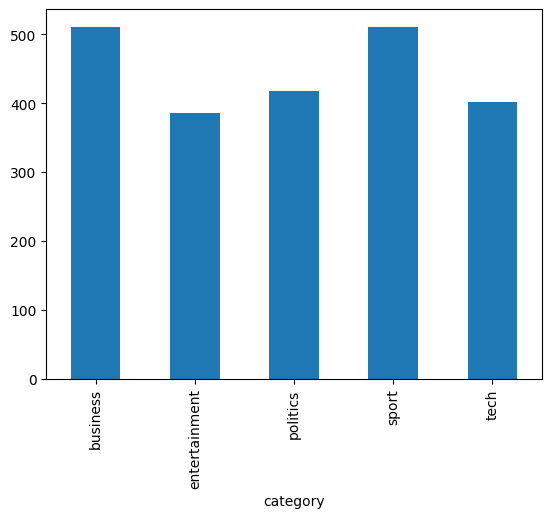

In [5]:
_=df.groupby(['category']).size().plot.bar()

In [6]:
np.random.seed(112)
df_train, df_val, df_test = np.split(df.sample(frac=1, random_state=42),
                                     [int(.8*len(df)), int(.9*len(df))])
print(len(df_train),len(df_val), len(df_test))

len_df_train,len_df_val, len_df_test=len(df_train),len(df_val), len(df_test)

unique_labels = df_train.category.unique().tolist()
label_dict = {label:i  for i, label in enumerate(unique_labels)}
print ('label_dict',label_dict)

tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

train, val = Dataset(df_train), Dataset(df_val)
train_dataloader = DataLoader(train, batch_size=8, shuffle=True)
val_dataloader = DataLoader(val, batch_size=8)

test = Dataset(df_test)

test_dataloader = DataLoader(test, batch_size=2)

1780 222 223
label_dict {'politics': 0, 'business': 1, 'entertainment': 2, 'tech': 3, 'sport': 4}


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [7]:
tokenizer.vocab_size

28996

In [8]:
ds=Dataset(df_train)

In [9]:
a=next(iter(ds))[0]['input_ids']
a

tensor([[  101,  3058,  1105,   171, 20293,  1339,  1207, 25414,  3711,  1111,
          1103, 15276,  6451,  9561,  1582,  1159, 11371,  1183,   171, 20293,
          1105,  1301, 22528,  3058,  1132,  1163,  1106,  1138,  3332,  1155,
          1149,  1594,  1113,  1296,  1168,   119,  1142,  1159,  1103,  6351,
         25414,  1110,  1166,  1150,  1431,  1321,  1103,  4755,  1111,  1103,
          1433,   188,  4265,  4256,  1105,  6695, 11751,  2521,  1107,  1103,
          5314,  1104,  1103, 24212,  7286,   118,  1126,  2486,  1242,  4320,
          1105,  2475,  1108,  1807,  1216,  1614,   119,  1122,  6226,  1103,
          5748,  3907,   188,  7868,  2371,  3511,  1134,  1486,   182,  1197,
           171, 20293,  1838,  1107,  1554, 19380,  5418,  1112,  1119,  1108,
          2257,  1106,  7693,  1283,  2304,  1170,  2304,  1164,  1117,  2398,
          1114,  1117, 23634,   119,  1112,  1119,  1500,  9891,   131,   178,
          1821,  1136,  3888,  1107,  1184,  2947,  

In [10]:
class BertClassifier(nn.Module):

    def __init__(self, dropout=0.5):

        super(BertClassifier, self).__init__()

        self.bert = BertModel.from_pretrained('bert-base-cased')
        self.dropout = nn.Dropout(dropout)
        self.linear = nn.Linear(768, 5)
        self.relu = nn.ReLU()

    def forward(self, input_id, mask):

        _, pooled_output = self.bert(input_ids= input_id, attention_mask=mask,return_dict=False)
        dropout_output = self.dropout(pooled_output)
        linear_output = self.linear(dropout_output)
        final_layer = self.relu(linear_output)

        return final_layer

In [11]:
def train(model, train_dataloader, val_dataloader, learning_rate, epochs):

    criterion = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr= learning_rate)

    model = model.to(device)
    criterion = criterion.to(device)

    for epoch_num in range(epochs):

            total_acc_train = 0
            total_loss_train = 0

            model.train()

            for train_input, train_label in tqdm(train_dataloader):

                train_label = train_label.to(device)
                mask = train_input['attention_mask'].to(device)
                input_id = train_input['input_ids'].squeeze(1).to(device)

                output = model(input_id, mask)

                batch_loss = criterion(output, train_label)
                total_loss_train += batch_loss.item()

                acc = (output.argmax(dim=1) == train_label).sum().item()
                total_acc_train += acc

                model.zero_grad()
                batch_loss.backward()
                optimizer.step()

            total_acc_val = 0
            total_loss_val = 0

            model.eval()
            with torch.no_grad():

                len_val=0
                for val_input, val_label in val_dataloader:
                    len_val=len_val+1

                    val_label = val_label.to(device)
                    mask = val_input['attention_mask'].to(device)
                    input_id = val_input['input_ids'].squeeze(1).to(device)

                    output = model(input_id, mask)

                    batch_loss = criterion(output, val_label)
                    total_loss_val += batch_loss.item()

                    acc = (output.argmax(dim=1) == val_label).sum().item()
                    total_acc_val += acc

            print(
                f'Epochs: {epoch_num + 1} | Train Loss: {total_loss_train / len_df_train: .3f} | Train Accuracy: {total_acc_train / len_df_train: .3f} | Val Loss: {total_loss_val / len_df_val: .3f} | Val Accuracy: {total_acc_val / len_df_val: .3f}')


def evaluate(model, test_dataloader ):

    model = model.to(device)

    total_acc_test = 0

    model.eval()
    with torch.no_grad():

        len_test=0
        for test_input, test_label in test_dataloader:

            len_test=len_test+1

            test_label = test_label.to(device)
            mask = test_input['attention_mask'].to(device)
            input_id = test_input['input_ids'].squeeze(1).to(device)

            output = model(input_id, mask)

            acc = (output.argmax(dim=1) == test_label).sum().item()
            total_acc_test += acc
    len_test=len_test*input_id.shape[0]
    print(f'Test Accuracy: {total_acc_test / len_df_test: .3f}')


In [12]:
EPOCHS = 3
model = BertClassifier()
LR = 1e-5

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

In [13]:
train(model, train_dataloader, val_dataloader, LR, EPOCHS)

  0%|          | 0/223 [00:00<?, ?it/s]


ValueError: too many values to unpack (expected 2)

In [ ]:
evaluate(model, test_dataloader)